In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import qutip as qt 
from CD_control_optimization.batch_optimizer import BatchOptimizer
from CD_control_optimization.optimization_analysis import OptimizationAnalysis, OptimizationSweepsAnalysis
from CD_control_optimization.optimization_sweeps import OptimizationSweeps
import matplotlib.pyplot as plt
from tensorflow.python.client import device_lib
device_lib.list_local_devices()


Need tf version 2.3.0 or later. Using tensorflow version: 2.3.1



[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 7895405352234925595, name: "/device:XLA_CPU:0"
 device_type: "XLA_CPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 6583065431777860746
 physical_device_desc: "device: XLA_CPU device"]

In [ ]:
N = 60
N_blocks = 6
fock = 3
N_multistart = 100
epochs = 100
use_displacements = False
no_CD_end = False
initial_states = [qt.tensor(qt.basis(2,0),qt.basis(N,0))]
#target_states = [qt.tensor(qt.basis(2,0), c.zero_logical)]
target_states = [qt.tensor(qt.basis(2,0),qt.basis(N,fock))]
#target_states = [qt.tensor(qt.basis(2,0), (qt.coherent(N,alpha) + qt.coherent(N,-alpha)).unit())]
desired_epsilon = 1e-3
term_fid = 1-desired_epsilon
dfid_stop = 1e-8
beta_scale = 2.0
alpha_scale = 0.5
name='Fock 3'

In [ ]:
opt = BatchOptimizer(initial_states=initial_states, target_states=target_states, N_blocks=N_blocks,term_fid = term_fid,
N_multistart=N_multistart, use_displacements=use_displacements, no_CD_end=no_CD_end, dfid_stop=dfid_stop, name=name, epochs=epochs, beta_scale=beta_scale, alpha_scale=alpha_scale,
fock=fock)

In [ ]:
opt.print_info()

In [ ]:
opt.optimize()

In [ ]:
opt.print_info()

In [ ]:
sweeper = OptimizationSweeps(opt_object=opt)

In [ ]:
sweeper.N_blocks_sweep(min_N_blocks=2, max_N_blocks=10, terminate=True)

In [3]:
#filename = 'Cat Creation.h5'
filename = "C:\\Users\\Alec\\Desktop\\Fock 1.h5"
sweep_analysis = OptimizationSweepsAnalysis(filename=filename)

In [4]:
sweep_analysis.sweep_names

['sweep N_blocks 2020-10-21 11:51:51 PM']

In [5]:
sweep_analysis._load_data()

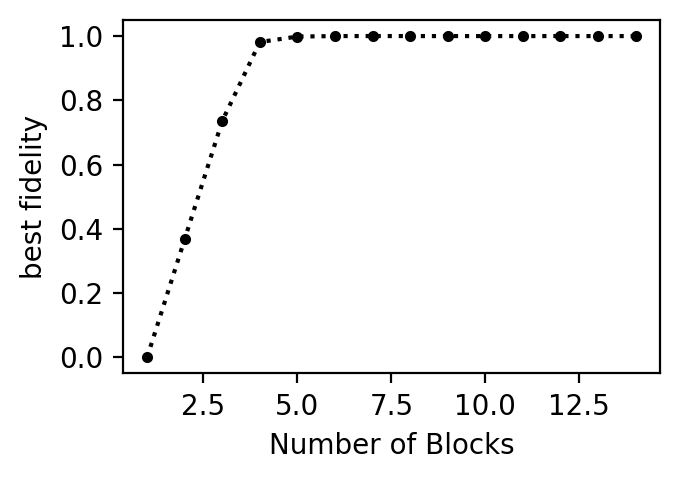

In [6]:
sweep_analysis.plot_sweep_fidelities()

In [ ]:
s = timestamps[0]
if len(timestamps) > 1:
    for t in timestamps:
        s =s + ',' + t
print(s)

In [ ]:
a = 'c:/a/test.h5'

In [ ]:
a.split(".")

In [ ]:
opt.optimize()

In [ ]:
c = opt.best_circuit()

In [ ]:
c['betas']

In [ ]:
opt.best_fidelity()

In [ ]:
opt.print_info()

In [ ]:
opt.modify_parameters(N_blocks = 10)

In [ ]:
tf.is_tensor(qt.create(10))

In [8]:
#filename = 'fock 3.h5'
analysis = OptimizationAnalysis(filename=filename)
#bs = analysis.betas()

In [12]:
analysis.timestamps

['2020-10-21 11:51:51 PM',
 '2020-10-21 11:51:53 PM',
 '2020-10-21 11:54:11 PM',
 '2020-10-21 11:57:02 PM',
 '2020-10-22 12:00:23 AM',
 '2020-10-22 12:04:13 AM',
 '2020-10-22 12:08:35 AM',
 '2020-10-22 12:10:08 AM',
 '2020-10-22 12:15:30 AM',
 '2020-10-22 12:17:56 AM',
 '2020-10-22 12:23:59 AM',
 '2020-10-22 12:30:56 AM',
 '2020-10-22 12:38:26 AM',
 '2020-10-22 12:46:27 AM',
 '2020-10-22 12:55:00 AM']

In [12]:
analysis.data[analysis.timestamps[-1]]['betas'][-1].shape

(100, 6)

In [14]:
analysis.print_info()

N_blocks: 15
N_cav: 80
N_multistart: 100
alpha_scale: 1.0
beta_scale: 6.0
comment: 
dfid_stop: 1e-08
elapsed_time_s: 130.02985072135925
epoch_size: 10
epochs: 1000
fock: 1
learning_rate: 0.01
name: Fock 1
no_CD_end: True
optimization_type: state transfer
term_fid: 0.99999
termination_reason: outside termination
use_displacements: False
filename: C:\Users\Alec\Desktop\Fock 1.h5

Best circuit parameters found:
betas:         [-0.58186+0.36013j  2.25962-2.92714j  3.34458+4.08446j -0.00007-0.00002j
  4.48046+0.25222j -0.44361-1.49839j -0.3663 +2.51722j  1.84194-3.21577j
 -1.73985+2.67922j  3.64196+4.06462j  3.11961+3.21285j -0.83388+0.35203j
  0.35902-0.29737j  0.73547-0.44709j  0.     +0.j     ]
alphas:        [-0.58186+0.36013j  2.25962-2.92714j  3.34458+4.08446j -0.00007-0.00002j
  4.48046+0.25222j -0.44361-1.49839j -0.3663 +2.51722j  1.84194-3.21577j
 -1.73985+2.67922j  3.64196+4.06462j  3.11961+3.21285j -0.83388+0.35203j
  0.35902-0.29737j  0.73547-0.44709j  0.     +0.j     ]
phis (de

In [ ]:
analysis.plot_fidelities()

In [ ]:
analysis.plot_mag_betas()

In [ ]:
analysis.plot_phase_betas()

In [ ]:
analysis.plot_mag_alphas()

In [ ]:
analysis.plot_phase_alphas()

In [ ]:
analysis.

In [ ]:
analysis.plot_average_magnitude_alpha()

In [ ]:
analysis.plot_average_magnitude_beta()

In [ ]:
analysis.data[analysis.timestamps[-1]]

In [ ]:
plt.figure(figsize=(8,6))
if len(all_fids.shape)>1:
    for fids in all_fids:
        plt.semilogy(1-fids)
else:
    plt.semilogy(1-all_fids)
plt.xlabel('epoch')
plt.ylabel('infidelity')
plt.title("100x batch optimization")

In [ ]:
opt.print_info()

In [ ]:
betas, alphas, phis, thetas = opt.get_numpy_vars()

In [ ]:
betas.T.shape

In [ ]:
fids = opt.batch_state_fidelities(opt.betas_rho, opt.betas_angle, opt.alphas_rho, opt.alphas_angle, opt.phis, opt.thetas)

In [ ]:
max_idx = tf.argmax(fids)[0,0].numpy()
max_idx

In [ ]:
fids[max_idx]

In [ ]:
betas[max_idx]

In [ ]:
with tf.device("XLA_GPU:0"):
    a = tf.constant(1.0)

In [ ]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

In [ ]:
tf.config.list_physical_devices()

In [ ]:
chi_ab = 2*np.pi*1e-9*10

In [ ]:
chi_ab

In [ ]:
nbar = 1/(4*chi_ab*1000)
nbar

In [ ]:
np.sqrt(nbar)

In [ ]:
np.sqrt(400.0)

In [ ]:
import h5py

In [ ]:
data = np.array([1.0,2.0,3.0])
with h5py.File('test.h5', "w") as f:
    fidelities = f.create_dataset("fidelities", data = data, maxshape=(None,))

In [ ]:
with h5py.File('test.h5', "a") as f:
    f['fidelities'].resize(4, axis=0)
    f['fidelities'][-1] = 4.0

In [ ]:
fs_MHz = np.linspace(0,0.2,201)
omegas_MRadps = 2*np.pi*fs_MHz
tau_us = 10
argument = omegas_MRadps*tau_us/2/np.pi
y = np.sinc(argument)**2


In [ ]:
plt.figure(figsize=(4,3),dpi=200)
plt.plot(fs_MHz*1e3, y, label='tau=10us')
plt.xlabel('KHz')
plt.ylabel('F')
plt.legend(frameon=False)